# Intro
The TV show *Silicon Valley* had an app called "See Food" that promised to identify food. 

In this notebook, you will write code using and comparing pre-trained models to choose one as an engine for the See Food app.

You won't go too deep into Keras or TensorFlow details in this particular exercise.  Don't worry. That you'll go deeper into model development soon.  For now, you'll make sure you know how to use pre-trained models.

# Set-Up

We will run a few steps of environmental set-up before writing your own code. You don't need to understand every detail of this set-up code. You can just run the following parts.

### 1) Create Image Paths
This workspace includes image files you will use to test your models. Run the cell below to store a few filepaths to these images in a variable `img_paths`.

In [1]:
import os
from os.path import join


hot_dog_image_dir = '../input/hot-dog-not-hot-dog/seefood/train/hot_dog'

hot_dog_paths = [join(hot_dog_image_dir,filename) for filename in 
                            ['1000288.jpg',
                             '127117.jpg']]

not_hot_dog_image_dir = '../input/hot-dog-not-hot-dog/seefood/train/not_hot_dog'
not_hot_dog_paths = [join(not_hot_dog_image_dir, filename) for filename in
                            ['823536.jpg',
                             '99890.jpg']]

img_paths = hot_dog_paths + not_hot_dog_paths

### 2) Run an Example Model
Here is the code you saw in the tutorial. It loads data, loads a pre-trained model, and makes predictions. Run this cell too.

In [2]:
from IPython.display import Image, display
from learntools.deep_learning.decode_predictions import decode_predictions
import numpy as np
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array


image_size = 224

def read_and_prep_images(img_paths, img_height=image_size, img_width=image_size):
    imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
    img_array = np.array([img_to_array(img) for img in imgs])
    output = preprocess_input(img_array)
    return(output)


my_model = ResNet50(weights='../input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels.h5')
test_data = read_and_prep_images(img_paths)
preds = my_model.predict(test_data)

most_likely_labels = decode_predictions(preds, top=3)

### 3) Visualize Predictions

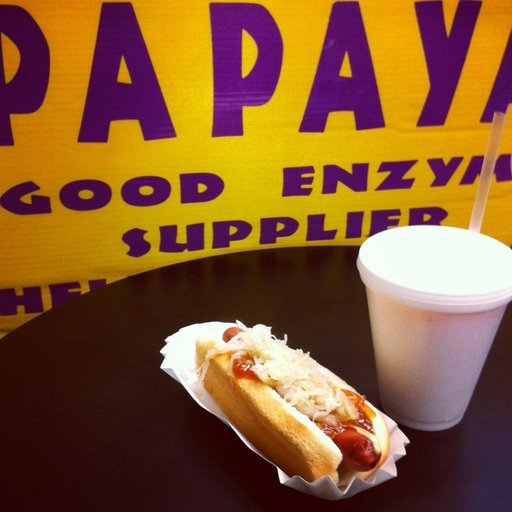

[('n07697537', 'hotdog', 0.97745252), ('n01981276', 'king_crab', 0.011711881), ('n07697313', 'cheeseburger', 0.003995345)]


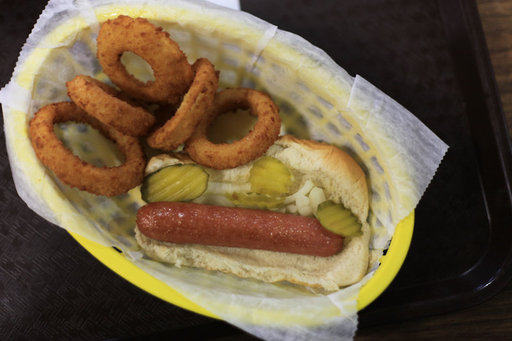

[('n07697537', 'hotdog', 0.97652984), ('n07697313', 'cheeseburger', 0.019225994), ('n02776631', 'bakery', 0.00078172347)]


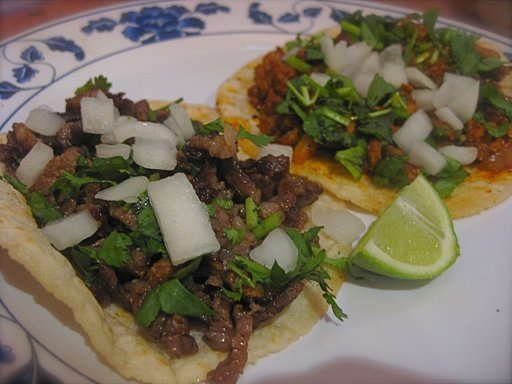

[('n07579787', 'plate', 0.61881053), ('n07880968', 'burrito', 0.10565358), ('n07697537', 'hotdog', 0.089705355)]


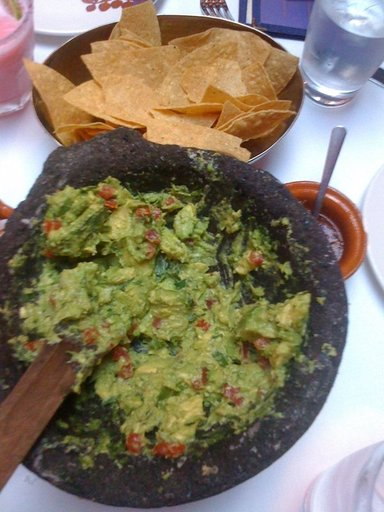

[('n07583066', 'guacamole', 0.99939215), ('n03786901', 'mortar', 0.00016563637), ('n07579787', 'plate', 8.6117077e-05)]


In [3]:
for i, img_path in enumerate(img_paths):
    display(Image(img_path))
    print(most_likely_labels[i])

### 4) Set Up Code Checking
As a last step before writing your own code, run the following cell to enable feedback on your code.

In [4]:
# Set up code checking
from learntools.core import binder
binder.bind(globals())
from learntools.deep_learning.exercise_3 import *
print("Setup Complete")

ModuleNotFoundError: No module named 'learntools.deep_learning.exercise_3'

# Exercises

You will write a couple useful functions in the next exercises. Then you will put these functions together to compare the effectiveness of various pretrained models for your hot-dog detection program.

### Exercise 1

We want to distinguish whether an image is a hot dog or not. But our models classify pictures into 1000 different categories. Write a function that takes the models predictions (in the same format as `preds` from the set-up code) and returns a list of `True` and `False` values.

Some tips:
- Work iteratively. Figure out one line at a time outsie the function, and print that line's output to make sure it's right. Once you have all the code you need, move it into the function `is_hot_dog`. If you get an error, check that you have copied the right code and haven't left anything out.
- The raw data we loaded in `img_paths` had two images of hot dogs, followed by two images of other foods. So, if you run your function on `preds`, which represents the output of the model on these images, your function should return `[True, True, False, False]`.
- You will want to use the `decode_predictions` function that was also used in the code provided above. We provided a line with this in the code cell to get you started.




In [ ]:
# Experiment with code outside the function, then move it into the function once you think it is right

# the following lines are given as a hint to get you started
decoded = decode_predictions(preds, top=1)
print(decoded)

def is_hot_dog(preds):
    '''
    inputs:
    preds_array:  array of predictions from pre-trained model

    outputs:
    is_hot_dog_list: a list indicating which predictions show hotdog as the most likely label
    '''
    pass
    
    
# uncomment the following line to check if your function is right.
# q_1.check()

If you'd like to see a hint or the solution, uncomment the appropriate line below.

**If you did not get a working solution, copy the solution code into your code cell above and run it. You will need this function for the next step.**

In [ ]:
# q_1.hint()
# q_1.solution()

In [ ]:
# Solution Code Here to be copied into exercise_3.py
labels = [d[0][1] for d in decoded]
out = [l == 'hotdog' for l in labels]
#return out

or

decoded = decode_predictions(preds, top=1)
out = []
for d in decoded:
    label = d[0][1]
    out.append(label=='hotdog')
out


### Exercise 2: Evaluate Model Accuracy

You have a model (called `my_model`). Is it good enough to build your app around? 

Find out by writing a function that calculates a model's accuracy (fraction correct). You will try an alternative model in the next step. So we will put this logic in a reusable function that takes data and the model as arguments, and returns the accuracy.

Tips:

 - Use the `is_hot_dog` function from above to help write your function
 - To save you some scrolling, here is the code from above where we used a TensorFlow model to make predictions:

```
my_model = ResNet50(weights='../input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels.h5')
test_data = read_and_prep_images(img_paths)
preds = my_model.predict(test_data)
```

In [ ]:
def calc_accuracy(model, paths_to_hotdog_images, path_to_other_images):
    pass

# Code to call calc_accuracy. The variables my_model, hot_dog_paths and not_hot_dog_paths were created in the setup code
my_model_accuracy = calc_accuracy(my_model, hot_dog_paths, not_hot_dog_paths)

print("Fraction correct: {}".format(my_model_accuracy))

# checks that your function calc_accuracy works correctly
q_2.check()

If you'd like a hint or the solution, uncomment the appropriate line below

In [ ]:
# q_2.hint()
# q_2.solution()

### Exercise 3:
There are other models besides the ResNet model (which we have loaded). For example, an earlier winner of the ImageNet competition is the VGG16 model.  

The code used to load a pretrained ResNet50 model was

```
from tensorflow.python.keras.applications import ResNet50
my_model = ResNet50(weights='../input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels.h5')
```

The VGG16 model structure is also importable from `tensorflow.python.keras.applications`. The import statement follows the same structure as what you used for the ResNet50 model. The weights for the model are stored at `../input/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels.h5`.

In the cell below, create a VGG16 model with the preloaded weights. Then use your `calc_accuracy` function to determine what fraction of images the VGG16 model correctly classifies.  Is it better or worse than the pretrained ResNet model?

If this model is used for an app that runs on a phone, what factors besides accuracy might you care about?

In [ ]:
# import the model
_

vgg16_model = _

vgg16_accuracy = _

q_3.check()


Uncomment the appropriate line below if you'd like a hint or the solution

In [ ]:
#q_3.hint()
#q_3.solution()

# Keep Going
You are ready for **[Transfer Learning](https://www.kaggle.com/dansbecker/transfer-learning/)**, which will allow you to apply the same level of power for your custom purposes.

---
**[Deep Learning Track Home](https://www.kaggle.com/learn/deep-learning)**